# Midterm
put names of your group here.  A maxiumum of three students can be in a group.  The class is allowed to discuss the problem with each other.  I expect one report per group.  Don't copy from each other.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import chi2

In the lecture on "least squares", we discussed the case where we used the wrong model (linear vs. quadratic).  We showed that in this case the chi-squared distribution does not follow the theoretical prediction but showed a different distribution.  Here I want to demonstrate that if your error is bimodal (as compared to Gaussian), and even if you are using the correct model function, the statistics do not agree with a least-squares fit.  This is not unsurprising but the subject of this midterm is to attempt to develop a Bayesian model to properly fit data that come from a bimodal distribution.

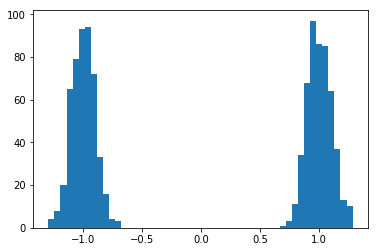

In [2]:
# here we show that using a bimodal distribution will cause problems with least-square fitting
which_dist=np.random.randint(0,2,size=1000)
error=np.where(which_dist,np.random.normal(-1,0.1,1000),np.random.normal(1,0.1,1000))
_ = plt.hist(error,bins=50)

In [3]:
x=np.linspace(-5,5,11)
chisq_list=[]
for i in range(1000):
    a=np.random.randint(0,2,size=11)
    error=np.where(a,np.random.normal(-1,0.1,11),np.random.normal(1,0.1,11))
    y=2*x+error
    p=np.polyfit(x,y,1)
    res=y-p[0]*x-p[1]
    chisq_list.append(np.sum(res**2))

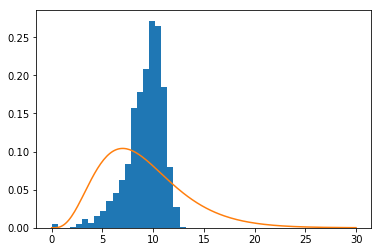

In [7]:
chi=np.linspace(0,30,200)
chi2distr=chi2.pdf(chi,9)
plt.hist(chisq_list,range=(0,30),bins=50,density=True)
plt.plot(chi,chi2distr)

## Midterm Problem:
1) Develop a maximum likelihood model for a bi-modal error distribution that is composed of two Gaussian distributions of width $\sigma$ at a y-distance of $\pm \Delta y$ around the real data point.  For this, you need to formulate the likelihood probability distribution of finding a particular dataset $\{y_{i}\}$ of N datapoints with this bi-modal error distribution assuming a “true” model $f(x_{i},\theta)$.  Here I expect an analytic expression.

2) Develop a method to fit a straight line through actual data points taken from a line with added bi-modal errors as described in the paragraph above.  Do this by maximizing the likelihood above.  Can you develop a similar procedure as for Gaussian errors (taking the log of the likelihood turns the maximization into a minimization problem)?

First try an analytical approach by taking the derivative and trying to find the maximum of the function.  If analytical math is too difficult you may approach the problem using numerical or approximate methods.

3) Consider the same scenario as in (1), but instead of fitting to a single line, fit to two parallel lines using a least squares approach (fit parameters should be slope, intercept and Δy). Be very careful how you calculate chi-squared (each data point should only count once).  Please produce a similar graph (Out[7]) to confirm that the fit indeed behaves properly and fits the theoretical chi-squared distribution.

Bonus: As bonus, can you solve the full Bayesian problem from (2)
